**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import math

#Libraries for Modelling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from scipy.stats import randint
from imblearn.over_sampling import (SMOTE, ADASYN, BorderlineSMOTE, SMOTENC)

#Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**Import CSV file in python and display data**

In [25]:
data = pd.read_csv('data.csv', sep=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


**Display target values and count**

In [26]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

**Data processing**

In [27]:
data.rename(columns = {'Nacionality':'Nationality', 'Age at enrollment':'Age', 'Daytime/evening attendance\t':'Daytime/evening attendance'}, inplace = True)
#data.isnull().sum()/len(data)*100

**Dropping the columns which has very low corelation with the target**

In [ ]:
#cor = data_cor.corr()['Target']

#drop columns having covariance less than 0.05
#to_remove = np.array(cor[abs(cor) < 0.3].keys())
#to_remove = np.delete(to_remove, len(to_remove)-1)
#data = data.drop(columns=to_remove, axis=1)

#to_keep = cor.sort_values(ascending=False, key=abs).head(11).keys()
#data = data[np.intersect1d(data.columns, to_keep)]

**Resampling data with multiple strategies**

In [28]:
oversampler_dict = {
    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'smotenc': SMOTENC(
        sampling_strategy='auto',
        categorical_features= list(range(0,35)),
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=5,
        n_jobs=4),

    'border': BorderlineSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),
}

In [29]:
def run_randomForests(x_train, x_test, y_train, y_test):

    #rf = RandomForestClassifier(n_estimators=290, random_state=365, max_depth=18, n_jobs=4, ccp_alpha=0.01)
    rf = RandomForestClassifier(random_state=365, ccp_alpha=0.001)
    rf.fit(x_train, y_train)

    y_pred = rf.predict(x_test)
    print(classification_report(y_test, y_pred))

    return y_pred

**Divide the data into input and outputs**

In [30]:
inputs = data.drop(['Target'], axis = 1)
target = data['Target']

**Split the data into training and testing data**

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                   target,
                                                   test_size = 0.3,
                                                   random_state = 365,
                                                   stratify = target)

In [33]:
# as the oversampling techniques use KNN
# we scale the variables
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Encoding target labels**

In [34]:
enc_t = LabelEncoder()
y_train_enc = enc_t.fit_transform(y_train)
y_test_enc = enc_t.transform(y_test)
unique, counts = np.unique(y_train_enc, return_counts=True)
print("Training data:", dict(zip(unique, counts)))
unique, counts = np.unique(y_test_enc, return_counts=True)
print("Testing data:", dict(zip(unique, counts)))
print({l: i for i, l in enumerate(enc_t.classes_)})

Training data: {0: 994, 1: 556, 2: 1546}
Testing data: {0: 427, 1: 238, 2: 663}
{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


**Normalizing data for better performance**

**Apply Random Forest Classifier to the original data**

In [35]:
classificationReport = run_randomForests(x_train, x_test, y_train_enc, y_test_enc)
print(classificationReport)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       427
           1       0.55      0.30      0.39       238
           2       0.78      0.91      0.84       663

    accuracy                           0.76      1328
   macro avg       0.70      0.66      0.67      1328
weighted avg       0.74      0.76      0.74      1328

[2 0 0 ... 0 2 0]


**Resampling and apply random forest to resampled data**

In [37]:
for oversampler in oversampler_dict.keys():
  print(oversampler)

  # resample
  x_resampled, y_resampled_enc = oversampler_dict[oversampler].fit_resample(x_train, y_train_enc)
  unique, counts = np.unique(y_resampled_enc, return_counts=True)
  print("Training data:", dict(zip(unique, counts)))

  # evaluate performance
  classificationReport = run_randomForests(x_resampled, x_test, y_resampled_enc, y_test_enc)
  print(classificationReport)

smote
Training data: {0: 1546, 1: 1546, 2: 1546}
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       427
           1       0.49      0.51      0.50       238
           2       0.82      0.85      0.83       663

    accuracy                           0.76      1328
   macro avg       0.71      0.70      0.70      1328
weighted avg       0.76      0.76      0.76      1328

[2 0 0 ... 0 2 0]
smotenc
Training data: {0: 1546, 1: 1546, 2: 1546}
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       427
           1       0.45      0.58      0.50       238
           2       0.83      0.79      0.81       663

    accuracy                           0.73      1328
   macro avg       0.69      0.70      0.69      1328
weighted avg       0.75      0.73      0.74      1328

[1 0 0 ... 0 2 0]
adasyn
Training data: {0: 1527, 1: 1428, 2: 1546}
              precision    recall  f1-score   suppor

**Hyperparameter Tuning for Random Forests**

In [14]:
def run_hyperparameters(rand_search, x_test, y_test):
  best_rf = rand_search.best_estimator_
  print('Best parameters set found on development set: ')
  print(rand_search.best_params_)
  print()

  means = rand_search.cv_results_['mean_test_score']
  stds = rand_search.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, rand_search.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))

  print()
  print('Detailed classification report:')
  print()
  print('The model is trained on the full development set.')
  print('The scores are computed on the full evaluation set.')
  print()
  y_true, y_pred = y_test, rand_search.predict(x_test)
  print(classification_report(y_true, y_pred))
  print()

In [15]:
for oversampler in oversampler_dict.keys():
  print(oversampler)

  # resample
  x_resampled, y_resampled_enc = oversampler_dict[oversampler].fit_resample(x_train, y_train_enc)

  #param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20), 'ccp_alpha':[0.001, 0.01, 0.1, 1, 10]}
  param_dist = {'n_estimators': randint(50,500), 'max_depth': randint(1,20), 'n_jobs':randint(1,10), 'ccp_alpha':[0.001, 0.01, 0.1, 1, 10]}

  # Create a random forest classifier
  rf = RandomForestClassifier()

  # Use random search to find the best hyperparameters
  rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

  # Fit the random search object to the data
  rand_search.fit(x_resampled, y_resampled_enc)
  run_hyperparameters(rand_search, x_test, y_test_enc)

smote
Best parameters set found on development set: 
{'ccp_alpha': 0.001, 'max_depth': 8, 'n_estimators': 53, 'n_jobs': 8}

0.716 (+/-0.062) for {'ccp_alpha': 0.01, 'max_depth': 4, 'n_estimators': 353, 'n_jobs': 9}
0.333 (+/-0.001) for {'ccp_alpha': 1, 'max_depth': 5, 'n_estimators': 370, 'n_jobs': 9}
0.778 (+/-0.076) for {'ccp_alpha': 0.001, 'max_depth': 8, 'n_estimators': 53, 'n_jobs': 8}
0.333 (+/-0.001) for {'ccp_alpha': 10, 'max_depth': 13, 'n_estimators': 202, 'n_jobs': 3}
0.718 (+/-0.064) for {'ccp_alpha': 0.01, 'max_depth': 13, 'n_estimators': 423, 'n_jobs': 6}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       427
           1       0.47      0.54      0.50       238
           2       0.81      0.83      0.82       663

    accuracy                           0.74      1328
   macro avg   

**Classification report for different parameters**

In [61]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

print('Best parameters set found on development set: ')
print(rand_search.best_params_)
print()

means = rand_search.cv_results_['mean_test_score']
stds = rand_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rand_search.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
print()

print('Detailed classification report:')
print()
print('The model is trained on the full development set.')
print('The scores are computed on the full evaluation set.')
print()
y_true, y_pred = y_test_enc, rand_search.predict(x_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set: 
{'max_depth': 15, 'n_estimators': 461, 'n_jobs': 9}

0.823 (+/-0.079) for {'max_depth': 14, 'n_estimators': 86, 'n_jobs': 9}
0.778 (+/-0.062) for {'max_depth': 8, 'n_estimators': 144, 'n_jobs': 5}
0.807 (+/-0.064) for {'max_depth': 11, 'n_estimators': 487, 'n_jobs': 4}
0.721 (+/-0.052) for {'max_depth': 4, 'n_estimators': 336, 'n_jobs': 9}
0.825 (+/-0.074) for {'max_depth': 15, 'n_estimators': 461, 'n_jobs': 9}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       427
           1       0.50      0.52      0.51       238
           2       0.82      0.86      0.84       663

    accuracy                           0.76      1328
   macro avg       0.72      0.71      0.71      1328
weighted avg       0.77      0.76      0.76      1328




**Applying Logistic Regression to the training data**

In [ ]:
#Scaling the data
mm_scaler = MinMaxScaler()
x_train_scaled = mm_scaler.fit_transform(x_train)
x_test_scaled = mm_scaler.transform(x_test)

In [ ]:
lr = LogisticRegression(random_state=365, solver='lbfgs', max_iter=1000)
lr = lr.fit(x_train_scaled, y_train_enc)
test_pred = lr.predict(x_test_scaled)
print(classification_report(y_test_enc, test_pred))

              precision    recall  f1-score   support

     Dropout       0.80      0.72      0.76       663
    Enrolled       0.70      0.70      0.70       663
    Graduate       0.77      0.83      0.80       663

    accuracy                           0.75      1989
   macro avg       0.75      0.75      0.75      1989
weighted avg       0.75      0.75      0.75      1989



**Hyperparameter Tuning for Logistic Regression**

In [ ]:
"""
tuned_parameters = [
     {'solver': ['lbfgs'], 'max_iter':[1, 1000]},
     {'solver': ['newton-cg'], 'max_iter':[1, 1000]},
     {'solver': ['liblinear'], 'max_iter':[1, 1000]}
 ]
"""
tuned_parameters = {'penalty' : ['l1', 'l2', 'elasticnet'],
                    'C' : np.logspace(-4, 4, 20),
                    'solver' : ['lbfgs','sag','saga'],
                    'max_iter' : [100, 1000, 2500, 5000]
                    }

 # Create a logistic regression classifier
lr = LogisticRegression()

# Use random search to find the best hyperparameters
rand_search = GridSearchCV(lr, param_grid = tuned_parameters, cv=3)

# Fit the random search object to the data
rand_search.fit(x_train_scaled, y_train_enc)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'sag', 'saga']})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

print('Best parameters set found on development set: ')
print(rand_search.best_params_)
print()

means = rand_search.cv_results_['mean_test_score']
stds = rand_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rand_search.cv_results_['params']):
  if(math.isnan(mean)==False):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
print()

print('Detailed classification report:')
print()
print('The model is trained on the full development set.')
print('The scores are computed on the full evaluation set.')
print()
y_true, y_pred = y_test_enc, rand_search.predict(x_test_scaled)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set: 
{'C': 10000.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

0.333 (+/-0.001) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
0.622 (+/-0.013) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.622 (+/-0.014) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
0.622 (+/-0.012) for {'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
0.333 (+/-0.000) for {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
0.622 (+/-0.013) for {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.622 (+/-0.013) for {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
0.622 (+/-0.012) for {'C': 0.0001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
0.333 (+/-0.001) for {'C': 0.0001, 'max_iter': 2500, 'penalty': 'l1', 'solver': 'saga'}
0.622 (+/-0.013) for {'C': 0.0001, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.622 (

**Finding important features in the dataset**

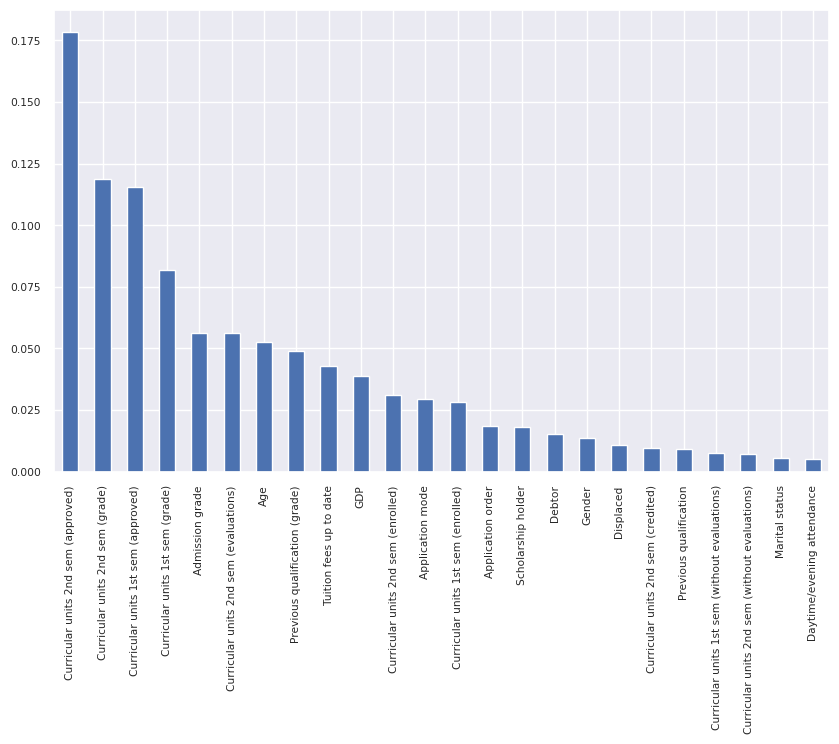

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.figure(figsize=(10,6))
#plt.plot(feature_importances.index, feature_importances.values, kind='bar')
#plt.show()
feature_importances.plot.bar();

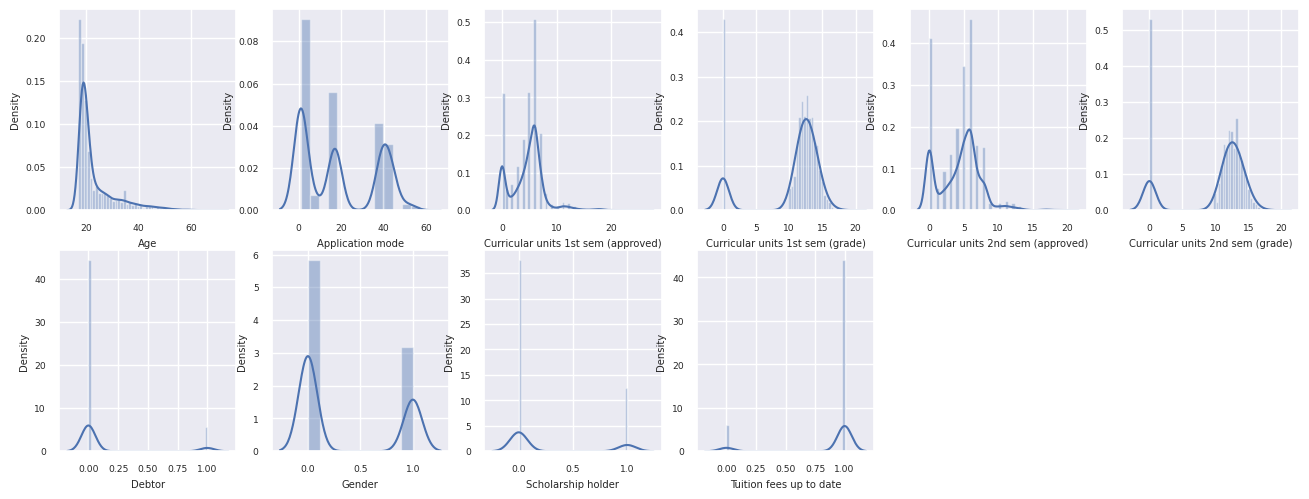

In [ ]:
'''plt.figure(figsize=(16,5))
sns.set(font_scale=0.6)
plt.subplot(4,6,1)
sns.distplot(data['Curricular units 2nd sem (approved)'])
plt.subplot(4,6,2)
sns.distplot(data['Curricular units 2nd sem (grade)'])
plt.subplot(4,6,3)
sns.distplot(data['Curricular units 2nd sem (grade)'])
plt.show()'''

plt.figure(figsize=(16,12))
sns.set(font_scale=0.6)
index = 1

for i in data.columns.drop("Target"):
  plt.subplot(4,6,index)
  sns.distplot(data[i])
  index = index + 1

plt.show()

ValueError: ignored

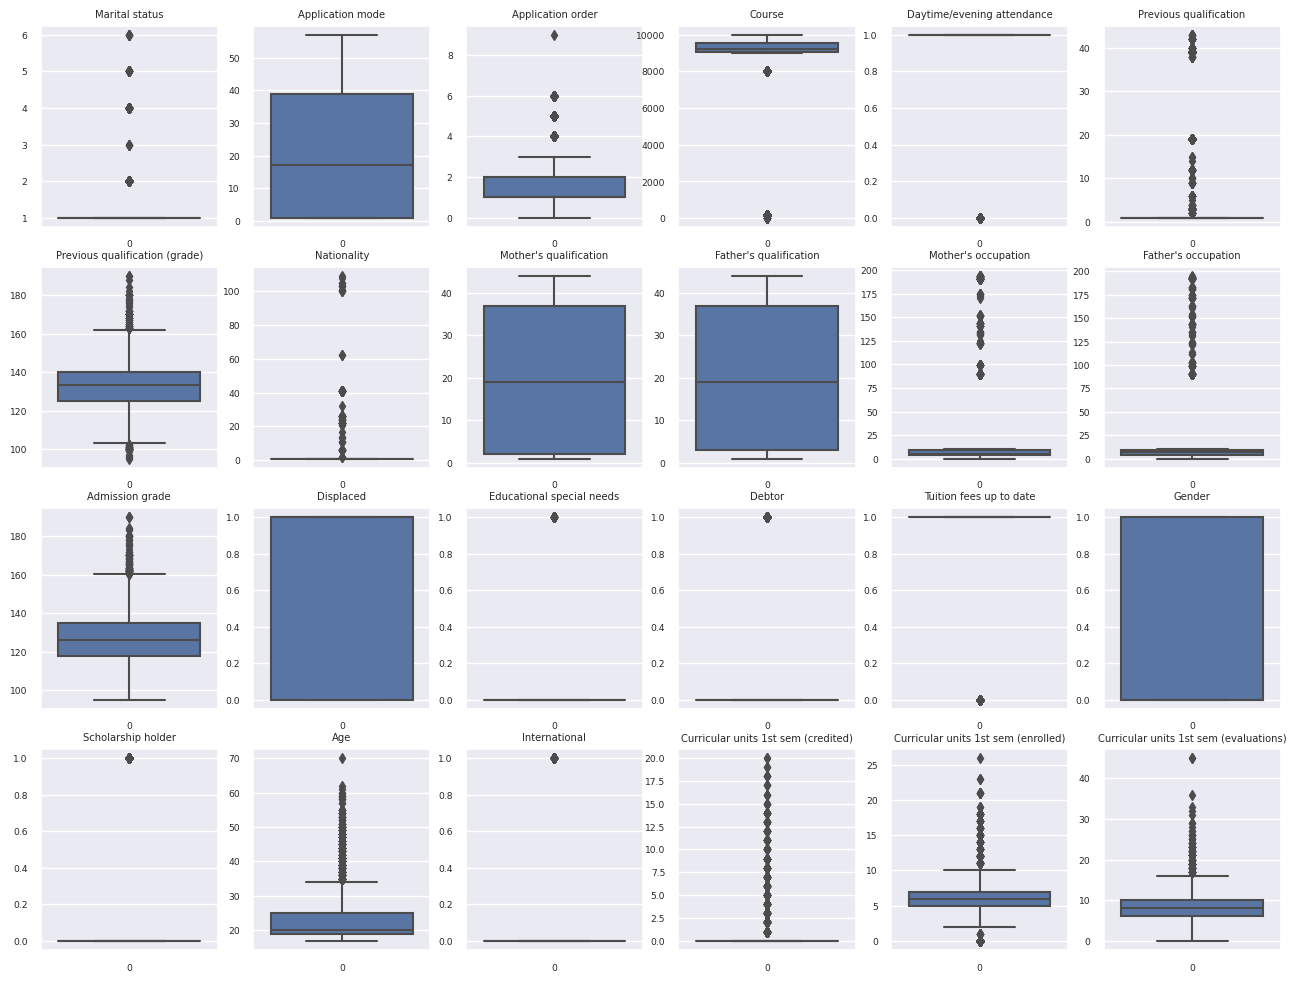

In [ ]:
plt.figure(figsize=(16,12))
sns.set(font_scale=0.6)
index = 1

for i in data.columns.drop("Target"):
  plt.subplot(4,6,index)
  #sns.distplot(data[i])
  g = sns.boxplot(data[i])
  g.set(title = i)
  index = index + 1

plt.show()

In [ ]:
percentile25 = data['Curricular units 2nd sem (approved)'].quantile(0.25)
percentile75 = data['Curricular units 2nd sem (approved)'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data = data[~((data['Curricular units 2nd sem (approved)'] > upper_limit) | (data['Curricular units 2nd sem (approved)'] < lower_limit))]
print(data.shape)
#print(new_data.shape)

(4380, 25)


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
#print(data < (Q1 - 1.5 * IQR)) ||(data > (Q3 + 1.5 * IQR))
new_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)
print(new_data.sha)

(4424, 25)
(984, 25)


<Figure size 1600x1200 with 0 Axes>

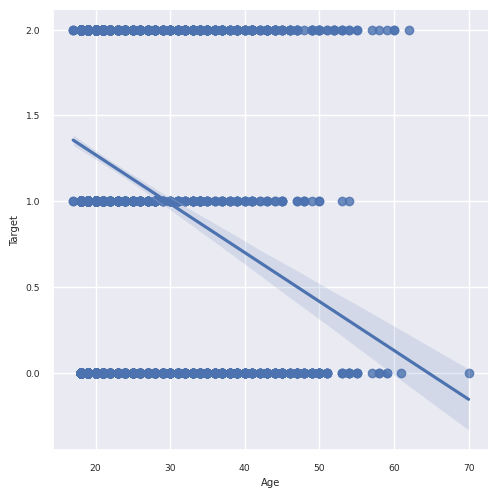

In [ ]:
plt.figure(figsize=(16,12))
sns.set(font_scale=0.6)
index = 1
sns.lmplot(x="Age", y="Target", data=data_cor, order=1)

#for i in data_cor.columns.drop("Target"):
  #plt.subplot(6,6,index)
  #sns.lmplot(x=data_cor[i], y="Target", data=data_cor, order=1)
  #index = index + 1

plt.show()